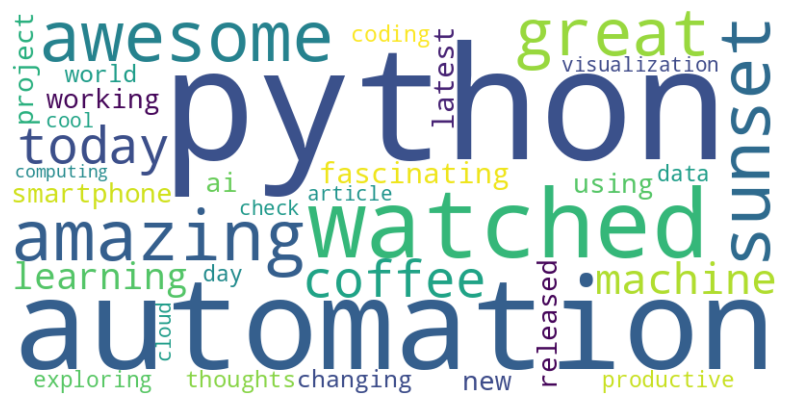

In [1]:
#5)
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load dataset (Ensure you have a CSV file with a "text" column)
file_path = "/content/text.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Function to clean tweet text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"RT\s+", "", text)  # Remove RT (retweets)
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning to all tweets
df["clean_text"] = df["text"].astype(str).apply(clean_text)

# Combine all tweets into a single text
all_text = " ".join(df["clean_text"])

# Define stopwords
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, colormap="viridis").generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()